<a href="https://colab.research.google.com/github/frankfurtmacmoses/cnn_bagging/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

print(tf.__version__)

2.17.0


Data loading and data preparation

In [ ]:
cifar100 = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
y_train = y_train.flatten()
y_test = y_test.flatten()

<ipython-input-6-cc00315035cb>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p.set(xticklabels=classes)


[[Text(0, 0, 'beaver'),
  Text(1, 0, 'dolphin'),
  Text(2, 0, 'otter'),
  Text(3, 0, 'seal'),
  Text(4, 0, 'whale'),
  Text(5, 0, 'aquarium fish'),
  Text(6, 0, 'flatfish'),
  Text(7, 0, 'ray'),
  Text(8, 0, 'shark'),
  Text(9, 0, 'trout'),
  Text(10, 0, 'orchids'),
  Text(11, 0, 'poppies'),
  Text(12, 0, 'roses'),
  Text(13, 0, 'sunflowers'),
  Text(14, 0, 'tulips'),
  Text(15, 0, 'bottles'),
  Text(16, 0, 'bowls'),
  Text(17, 0, 'cans'),
  Text(18, 0, 'cups'),
  Text(19, 0, 'plates'),
  Text(20, 0, 'apples'),
  Text(21, 0, 'mushrooms'),
  Text(22, 0, 'oranges'),
  Text(23, 0, 'pears'),
  Text(24, 0, 'sweet peppers'),
  Text(25, 0, 'clock'),
  Text(26, 0, 'computer keyboard'),
  Text(27, 0, 'lamp'),
  Text(28, 0, 'telephone'),
  Text(29, 0, 'television'),
  Text(30, 0, 'bed'),
  Text(31, 0, 'chair'),
  Text(32, 0, 'couch'),
  Text(33, 0, 'table'),
  Text(34, 0, 'wardrobe'),
  Text(35, 0, 'bee'),
  Text(36, 0, 'beetle'),
  Text(37, 0, 'butterfly'),
  Text(38, 0, 'caterpillar'),
  Text(

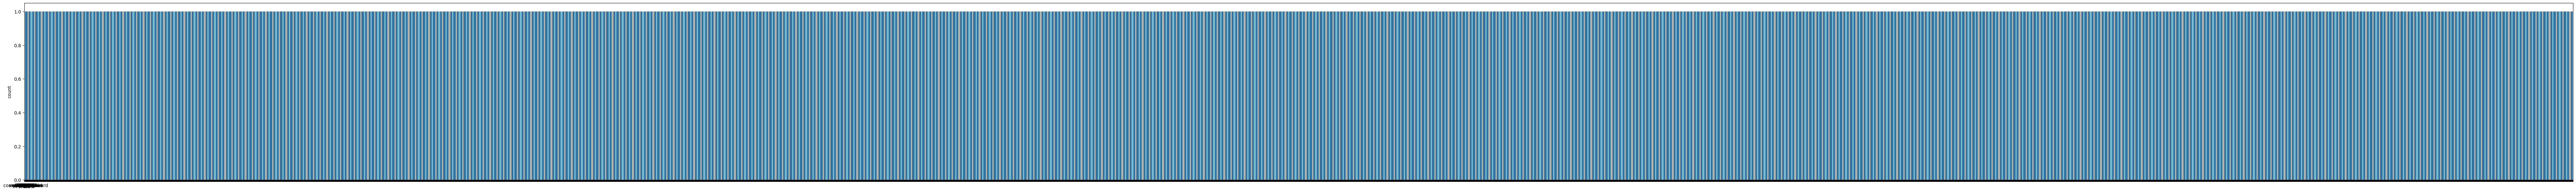

In [ ]:
classes = [
    'beaver', 'dolphin', 'otter', 'seal', 'whale',          # Aquatic mammals
    'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',   # Fish
    'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',  # Flowers
    'bottles', 'bowls', 'cans', 'cups', 'plates',           # Food containers
    'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',  # Fruit and vegetables
    'clock', 'computer keyboard', 'lamp', 'telephone', 'television',  # Household electrical devices
    'bed', 'chair', 'couch', 'table', 'wardrobe',           # Household furniture
    'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',  # Insects
    'bear', 'leopard', 'lion', 'tiger', 'wolf',             # Large carnivores
    'bridge', 'castle', 'house', 'road', 'skyscraper',      # Large man-made outdoor things
    'cloud', 'forest', 'mountain', 'plain', 'sea',          # Large natural outdoor scenes
    'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',  # Large omnivores and herbivores
    'fox', 'porcupine', 'possum', 'raccoon', 'skunk',       # Medium-sized mammals
    'crab', 'lobster', 'snail', 'spider', 'worm',           # Non-insect invertebrates
    'baby', 'boy', 'girl', 'man', 'woman',                  # People
    'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',   # Reptiles
    'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',      # Small mammals
    'maple', 'oak', 'palm', 'pine', 'willow',               # Trees
    'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',  # Vehicles 1
    'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor'  # Vehicles 2
]


plt.figure(figsize=(100,7))
p = sns.countplot(y_train.flatten())
p.set(xticklabels=classes)

In [ ]:
np.isnan(x_train).any()

False

In [ ]:
np.isnan(x_test).any()

False

In [ ]:
input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=100)
y_test = tf.one_hot(y_test.astype(np.int32), depth=100)

In [ ]:
y_train[0]

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.], shape=(100,), dtype=float32)


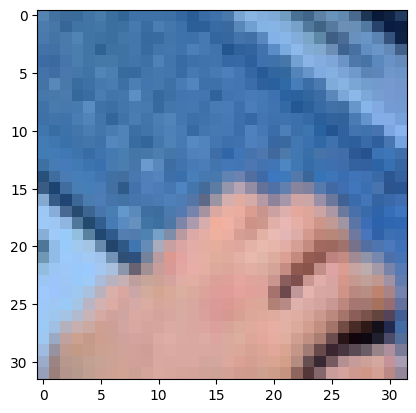

In [ ]:
plt.imshow(x_train[10])
print(y_train[10])

#CNN
##Here the building of CNN starts

In [ ]:
batch_size = 32
num_classes = 100
epochs = 100

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


#Fitting the Training Data with the model

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size,validation_data=(x_test, y_test),
                    epochs=epochs)

NameError: name 'model' is not defined

#Evaluating the model

## Loss and Accuracy curves diagram

In [ ]:
fig, ax = plt.subplots(4,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

ax[2].plot(history.history['val_loss'], color='b', label="Testing Loss")
legend = ax[2].legend(loc='best', shadow=True)

ax[3].plot(history.history['val_acc'], color='b', label="Testing Accuracy")
legend = ax[3].legend(loc='best', shadow=True)

# OR with plotline library

In [ ]:
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, facet_wrap
import pandas as pd

# Extract data from the history object after training
history_data = {
    'epoch': range(1, len(history.history['loss']) + 1),
    'Training Loss': history.history['loss'],
    'Training Accuracy': history.history['accuracy'],        # Use 'acc' if that's the key
    'Testing Loss': history.history['val_loss'],
    'Testing Accuracy': history.history['val_accuracy']      # Use 'val_acc' if that's the key
}

# Convert history data to a DataFrame in long format
history_df = pd.DataFrame(history_data)
history_long = history_df.melt(id_vars=['epoch'],
                               value_vars=['Training Loss', 'Training Accuracy', 'Testing Loss', 'Testing Accuracy'],
                               var_name='Metric',
                               value_name='Value')

# Create the plot using plotnine
plot = (ggplot(history_long, aes(x='epoch', y='Value', color='Metric')) +
        geom_line() +
        facet_wrap('~Metric', ncol=1, scales='free_y') +
        labs(x='Epoch', y='Value', title='Training and Testing Metrics Over Epochs') +
        theme_minimal())

# Display the plot
print(plot)


# Predict the resuts

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

#Confusion Matrix

In [ ]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

In [ ]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)

# OR

In [ ]:
from plotnine import ggplot, aes, geom_tile, scale_fill_gradient, labs, theme_minimal, theme, element_text
import pandas as pd
import numpy as np

# Convert confusion matrix to a DataFrame suitable for plotting
confusion_df = pd.DataFrame(confusion_mtx.numpy(), index=classes, columns=classes)
confusion_df = confusion_df.reset_index().melt(id_vars='index')
confusion_df.columns = ['True Label', 'Predicted Label', 'Count']

# Plot using plotnine
plot = (ggplot(confusion_df, aes(x='Predicted Label', y='True Label', fill='Count')) +
        geom_tile(color='white') +
        scale_fill_gradient(low="white", high="blue") +
        labs(title='Confusion Matrix', x='Predicted Label', y='True Label') +
        theme_minimal() +
        theme(axis_text_x=element_text(rotation=90, hjust=1),
              axis_text_y=element_text(rotation=0),
              plot_title=element_text(size=14, weight='bold'))
       )

# Display the plot
print(plot)